# Pivoting & Visualisations
## Set up

In [106]:
import requests
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
from plotnine import *
from IPython.display import HTML, Image
from bs4 import BeautifulSoup
import json
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from ssl import Options
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import warnings
warnings.filterwarnings("ignore")


## Step 1: read the csv created by previous coding

In [107]:
# read the csv file

df_all_games = pd.read_csv('df_all_games.csv')

df_all_games

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
0,570,Dota 2,Valve,Valve,NaN,1611153,338953,0,"200,000,000 .. 500,000,000",37228,1393,853,711,0,0,0,532699
1,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,NaN,6207621,811918,0,"50,000,000 .. 100,000,000",30347,822,5979,331,0,0,0,1010721
2,1172470,Apex Legends,Respawn Entertainment,Electronic Arts,NaN,513660,105734,0,"50,000,000 .. 100,000,000",8491,917,834,498,0,0,0,363786
3,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",NaN,1231039,925364,0,"50,000,000 .. 100,000,000",22551,734,5940,230,0,0,0,328139
4,1063730,New World,Amazon Games,Amazon Games,NaN,176376,75957,0,"50,000,000 .. 100,000,000",9175,723,3226,454,1999,3999,50,17498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58200,2227180,Water 2050,Totem Games,Totem Games,NaN,2,0,0,"0 .. 20,000",0,0,0,0,399,399,0,0
58201,2306850,Parcel Problems,JD,JD,NaN,1,0,0,"0 .. 20,000",0,0,0,0,199,199,0,0
58202,2319560,Road To Place,Goose Strangler,lunatic studios,NaN,0,1,0,"0 .. 20,000",0,0,0,0,299,299,0,0
58203,2289500,FirstResponderVR,Emergisim Pty Ltd,Emergisim Pty Ltd,NaN,3,1,0,"0 .. 20,000",0,0,0,0,599,599,0,0


## Step 2: Data pre-processing 

## 1.0 - add rank to the df

In [108]:
# reset the index to start with 1 and make it a new column

df_all_games['spy_rank'] = df_all_games.index + 1

df_all_games

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,spy_rank
0,570,Dota 2,Valve,Valve,NaN,1611153,338953,0,"200,000,000 .. 500,000,000",37228,1393,853,711,0,0,0,532699,1
1,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,NaN,6207621,811918,0,"50,000,000 .. 100,000,000",30347,822,5979,331,0,0,0,1010721,2
2,1172470,Apex Legends,Respawn Entertainment,Electronic Arts,NaN,513660,105734,0,"50,000,000 .. 100,000,000",8491,917,834,498,0,0,0,363786,3
3,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",NaN,1231039,925364,0,"50,000,000 .. 100,000,000",22551,734,5940,230,0,0,0,328139,4
4,1063730,New World,Amazon Games,Amazon Games,NaN,176376,75957,0,"50,000,000 .. 100,000,000",9175,723,3226,454,1999,3999,50,17498,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58200,2227180,Water 2050,Totem Games,Totem Games,NaN,2,0,0,"0 .. 20,000",0,0,0,0,399,399,0,0,58201
58201,2306850,Parcel Problems,JD,JD,NaN,1,0,0,"0 .. 20,000",0,0,0,0,199,199,0,0,58202
58202,2319560,Road To Place,Goose Strangler,lunatic studios,NaN,0,1,0,"0 .. 20,000",0,0,0,0,299,299,0,0,58203
58203,2289500,FirstResponderVR,Emergisim Pty Ltd,Emergisim Pty Ltd,NaN,3,1,0,"0 .. 20,000",0,0,0,0,599,599,0,0,58204


## 2.0 - create data frame of top 100 games and top 500 games

In [109]:
# calculate ranking
df_all_games['ranking'] = (
    df_all_games['ccu']
    .replace(0, np.nan)  # replace 0 with NaN to exclude from ranking
    .rank(method='min', ascending=False, na_option='bottom')  # calculate ranking, set NaN to bottom
    .fillna(58205)  # replace NaN with specified value
)

# sort by ranking
df_all_games = df_all_games.sort_values(by='ranking')

# create classification column
df_all_games['classification'] = np.where(
    df_all_games['developer'] == df_all_games['publisher'], 
    'same', 
    'different'
)

df_all_games

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,spy_rank,ranking,classification
1,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,NaN,6207621,811918,0,"50,000,000 .. 100,000,000",30347,822,5979,331,0,0,0,1010721,2,1.0,different
0,570,Dota 2,Valve,Valve,NaN,1611153,338953,0,"200,000,000 .. 500,000,000",37228,1393,853,711,0,0,0,532699,1,2.0,same
2,1172470,Apex Legends,Respawn Entertainment,Electronic Arts,NaN,513660,105734,0,"50,000,000 .. 100,000,000",8491,917,834,498,0,0,0,363786,3,3.0,different
3,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",NaN,1231039,925364,0,"50,000,000 .. 100,000,000",22551,734,5940,230,0,0,0,328139,4,4.0,same
17,1085660,Destiny 2,Bungie,Bungie,NaN,442135,89132,0,"20,000,000 .. 50,000,000",8276,1965,361,1277,0,0,0,171726,18,5.0,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,1091260,Crunch,K7 Software,K7 Software,NaN,11,1,0,"0 .. 20,000",0,0,0,0,0,0,0,0,23520,16942.0,same
23520,1061900,ThunderGod,Goodbye Kansas Game Invest,Goodbye Kansas Game Invest,NaN,11,3,0,"0 .. 20,000",0,0,0,0,999,999,0,0,23521,16942.0,same
23521,1069270,Rotatex,Dnovel,My Way Games,NaN,18,7,0,"0 .. 20,000",0,0,0,0,119,1199,90,0,23522,16942.0,different
23512,1027060,CreatorCrate,Jori Ryan,CreatorCrate Games,NaN,14,1,0,"0 .. 20,000",0,0,0,0,499,499,0,0,23513,16942.0,different


In [110]:
# convert the dataframe to csv file

df_all_games.to_csv('df_games_with_rank.csv')

In [111]:
df_all_games.columns

Index(['appid', 'name', 'developer', 'publisher', 'score_rank', 'positive',
       'negative', 'userscore', 'owners', 'average_forever', 'average_2weeks',
       'median_forever', 'median_2weeks', 'price', 'initialprice', 'discount',
       'ccu', 'spy_rank', 'ranking', 'classification'],
      dtype='object')

In [112]:
df_games_100 = df_all_games[df_all_games['spy_rank'] <= 100]

df_games_500 = df_all_games[df_all_games['spy_rank'] <= 500]

## 3.0 - analyze for all games with same developer and publisher

In [113]:
df_games_different = df_all_games[df_all_games['classification'] == 'different']

df_games_same = df_all_games[df_all_games['classification'] == 'same']

In [114]:
# to see the number of games that have the same developer and publisher

len(df_games_different)

18968

In [115]:
len(df_games_same)

39237

## Step 3: Data Visualisation

### Visualisation 1: 
### plot for the proportion of all games which are produced by same and different developers and publishers

<Figure size 5000x5000 with 0 Axes>

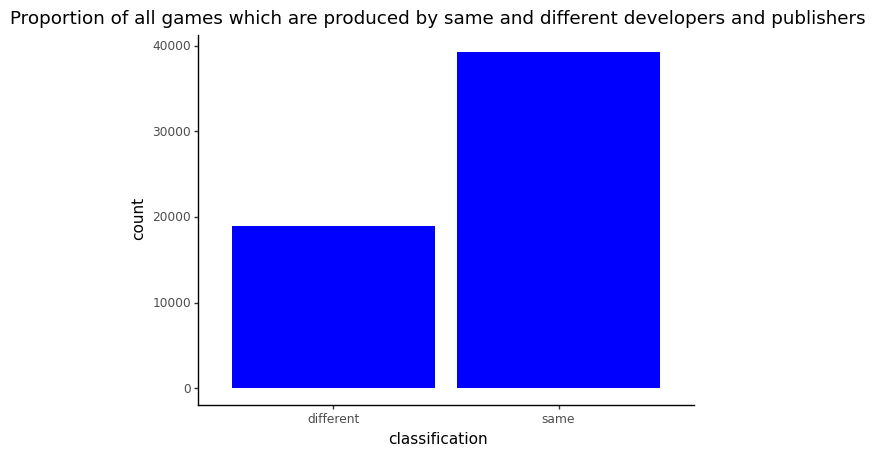

<ggplot: (8776483775799)>

In [116]:
# plot for the proportion of all games which are produced by same and different developers and publishers

g_1 = ggplot(df_all_games, aes(x='classification')) +\
      geom_bar(fill='blue') +\
      labs(title='Proportion of all games which are produced by same and different developers and publishers', x='classification', y='count') +\
      theme_classic()

g_1

### Visualisation 2: 
### how does the classification between same and different developers and publishers influence the rank of the games (Regression)

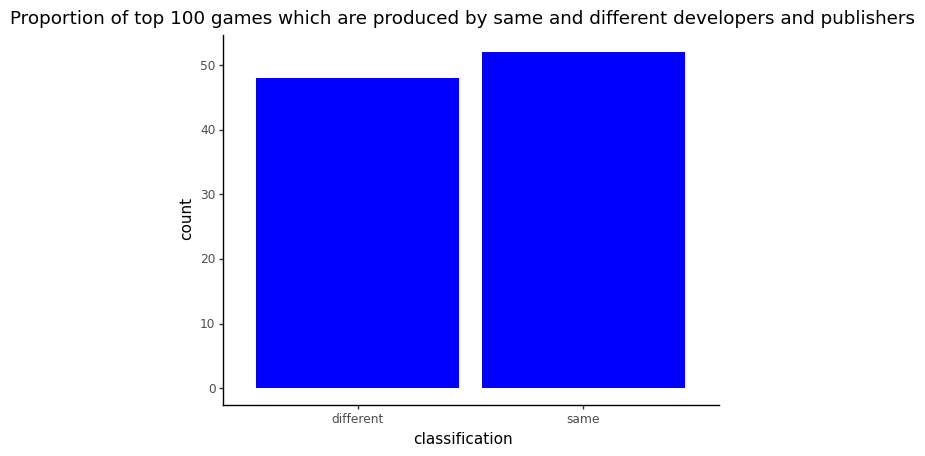

<ggplot: (8776488282859)>

In [117]:
# plot for the proportion of top 100 games which are produced by same and different developers and publishers

g_2 = ggplot(df_games_100, aes(x='classification')) +\
      geom_bar(fill='blue') +\
      labs(title='Proportion of top 100 games which are produced by same and different developers and publishers', x='classification', y='count') +\
      theme_classic()
      
g_2

### Visualisation 3 & 4:
### plot for the proportion of all games which are produced by same and different developers and publisher

In [118]:
df_games_different_100  = df_games_100[df_games_100['classification'] == 'different']

df_games_same_100 = df_games_100[df_games_100['classification'] == 'same']

### Different

In [119]:
groupby_columns = ['developer', 'publisher']
df_tmp_100_games_different = df_games_different_100.groupby(groupby_columns)['appid'].nunique().reset_index()
df_tmp_100_games_different.rename(columns={'appid': 'num_games'}, inplace=True)

df_tmp_100_games_different = df_tmp_100_games_different.sort_values(by=['num_games'], ascending=False)

df_tmp_100_games_different

,developer,publisher,num_games
21,Infinity Ward,Activision,2
41,Ubisoft Montreal,Ubisoft,2
0,24 Entertainment,NetEase Games Global,1
34,Smilegate RPG,Amazon Games,1
26,"Nicalis, Inc., Edmund McMillen","Nicalis, Inc.",1
27,No More Room in Hell Team,Lever Games,1
28,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,1
29,Rare Ltd,Xbox Game Studios,1
30,Respawn Entertainment,Electronic Arts,1
31,Rockstar North,Rockstar Games,1


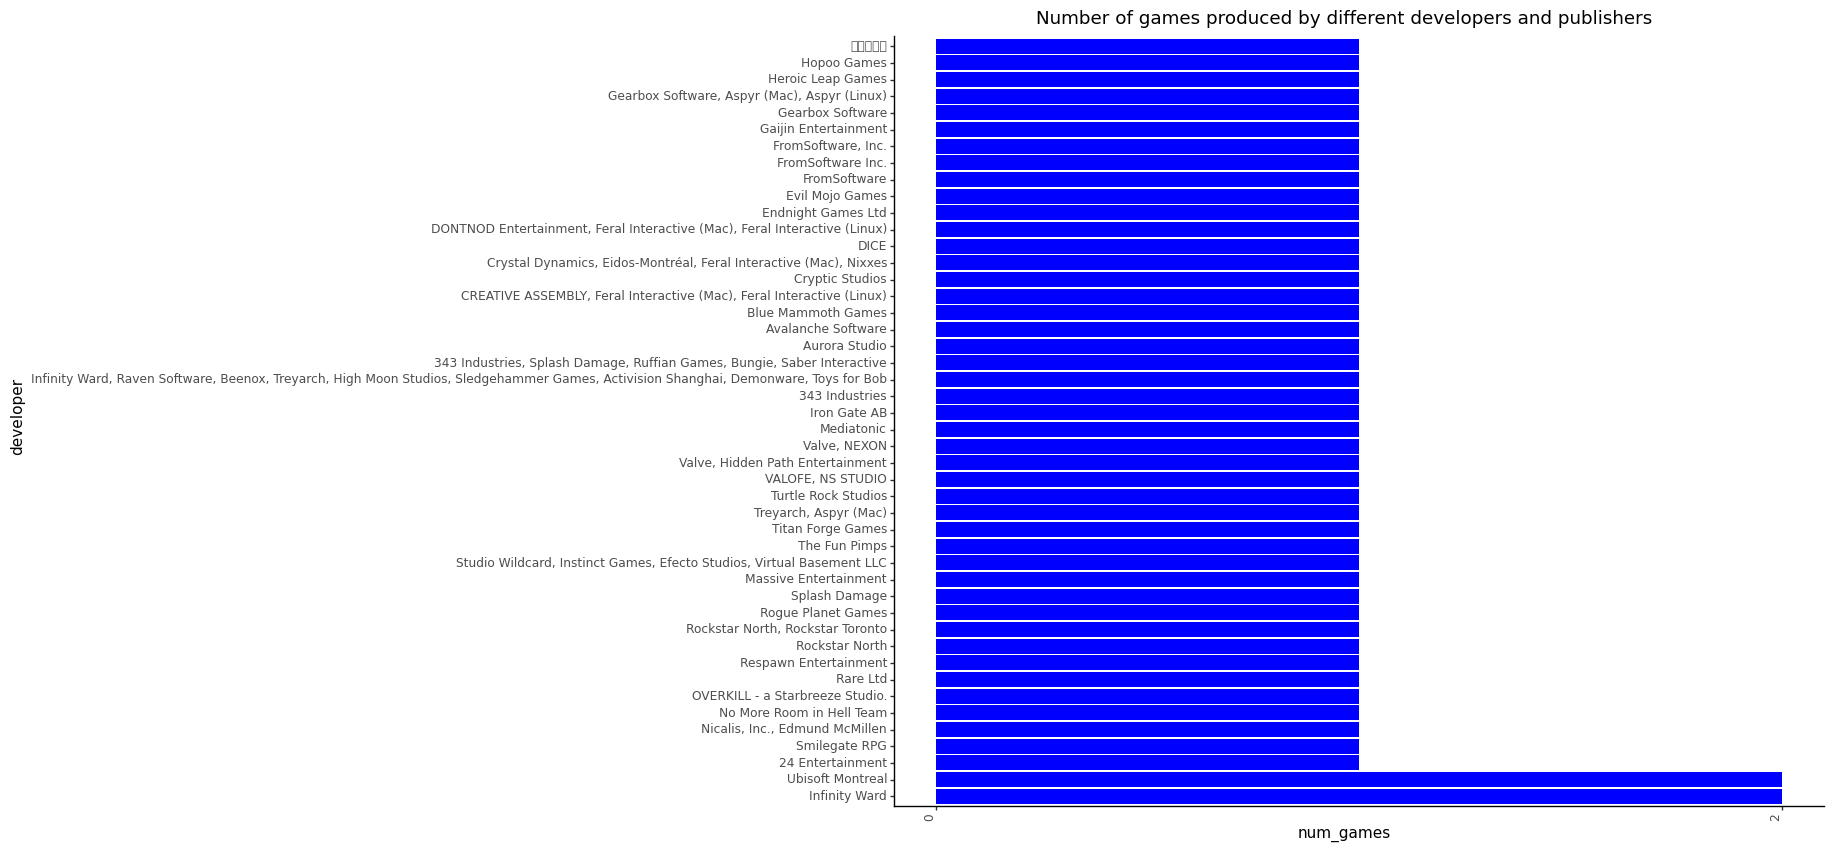

<ggplot: (8776431132106)>

In [120]:
# plot for the df_tmp_all_games_different and order the x axis by the number of games and make the blank space bigger
g_3 = ggplot(df_tmp_100_games_different, aes(x='developer', y='num_games')) +\
        geom_bar(stat='identity', fill='blue') +\
        labs(title='Number of games produced by different developers and publishers', x='developer', y='num_games') +\
        theme_classic() +\
        theme(axis_text_x=element_text(angle=90, hjust=1), figure_size=(12, 10)) +\
        coord_flip() +\
        scale_x_discrete(limits=df_tmp_100_games_different['developer'].tolist()) +\
        scale_y_continuous(breaks=range(0, 10, 2))
g_3

### Same

In [121]:
groupby_columns = ['developer', 'publisher']

df_tmp_100_games_same = (
    df_games_same_100
    .groupby(groupby_columns)['appid']
    .nunique()
    .reset_index(name='num_games')
    .sort_values(by='num_games', ascending=False)
    .query('num_games != 16')
)

df_tmp_100_games_same


,developer,publisher,num_games
26,Rockstar Games,Rockstar Games,2
0,Amazon Games,Amazon Games,1
20,MY.GAMES,MY.GAMES,1
21,Northwood Studios,Northwood Studios,1
22,Pearl Abyss,Pearl Abyss,1
23,Psyonix LLC,Psyonix LLC,1
24,Re-Logic,Re-Logic,1
25,RobTop Games,RobTop Games,1
27,Smartly Dressed Games,Smartly Dressed Games,1
1,Axolot Games,Axolot Games,1


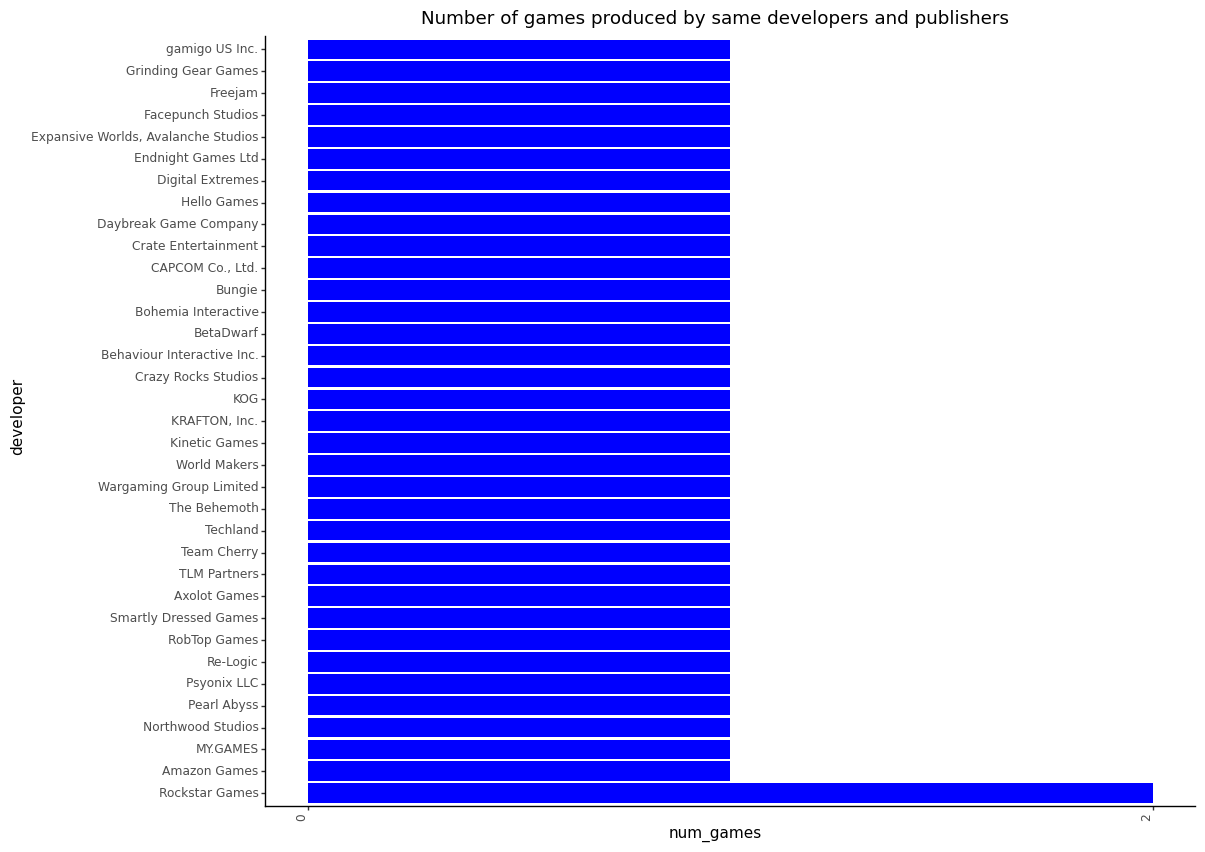

<ggplot: (8776488282739)>

In [122]:
# plot for the df_tmp_all_games_same and order the x axis by the number of games and make the blank space bigger

g_4 = ggplot(df_tmp_100_games_same, aes(x='developer', y='num_games')) +\
        geom_bar(stat='identity', fill='blue') +\
        labs(title='Number of games produced by same developers and publishers', x='developer', y='num_games') +\
        theme_classic() +\
        theme(axis_text_x=element_text(angle=90, hjust=1), figure_size=(12, 10)) +\
        coord_flip() +\
        scale_x_discrete(limits=df_tmp_100_games_same['developer'].tolist()) +\
        scale_y_continuous(breaks=range(0, 10, 2))
g_4

### Visulisation 5: 
### which developer produce the most games

In [123]:
# group the data by the developer and count the number of games

groupby_columns = ['developer']

# select developers that have more than 30 games

df_tmp_selected_games = (
    df_all_games
    .groupby(groupby_columns)['appid']
    .nunique()
    .reset_index(name='num_games')
    .sort_values(by='num_games', ascending=False)
    .query('num_games >= 15')
)

df_tmp_selected_games

,developer,num_games
5543,Choice of Games,147
16839,Laush Dmitriy Sergeevich,116
27450,Sokpop Collective,100
15690,"KOEI TECMO GAMES CO., LTD.",98
4224,Boogygames Studios,95
...,...,...
20869,"Nippon Ichi Software, Inc.",15
19189,Microids,15
26251,Seaborgium Entertainment,15
27788,"Spike Chunsoft Co., Ltd.",15


In [124]:
len(df_tmp_selected_games)

193

In [125]:
df_tmp_all_games= (
    df_all_games
    .groupby(groupby_columns)['appid']
    .nunique()
    .reset_index(name='num_games')
    .sort_values(by='num_games', ascending=False)
)

df_tmp_all_games

,developer,num_games
5543,Choice of Games,147
16839,Laush Dmitriy Sergeevich,116
27450,Sokpop Collective,100
15690,"KOEI TECMO GAMES CO., LTD.",98
4224,Boogygames Studios,95
...,...,...
13696,"IKO, Reynard Films, Prefrontal Cortex",1
13695,"IKINAGAMES, Nanali Studios",1
13693,IKIGames,1
13692,IKIGAI Play,1


In [126]:
len(df_tmp_all_games)

36575

### Proportion 1: 
### the proportion that how many developers have created more than or equal to 15 games

In [127]:
proportion  = len(df_tmp_selected_games) / len(df_tmp_all_games) * 100

proportion

0.5276828434723171

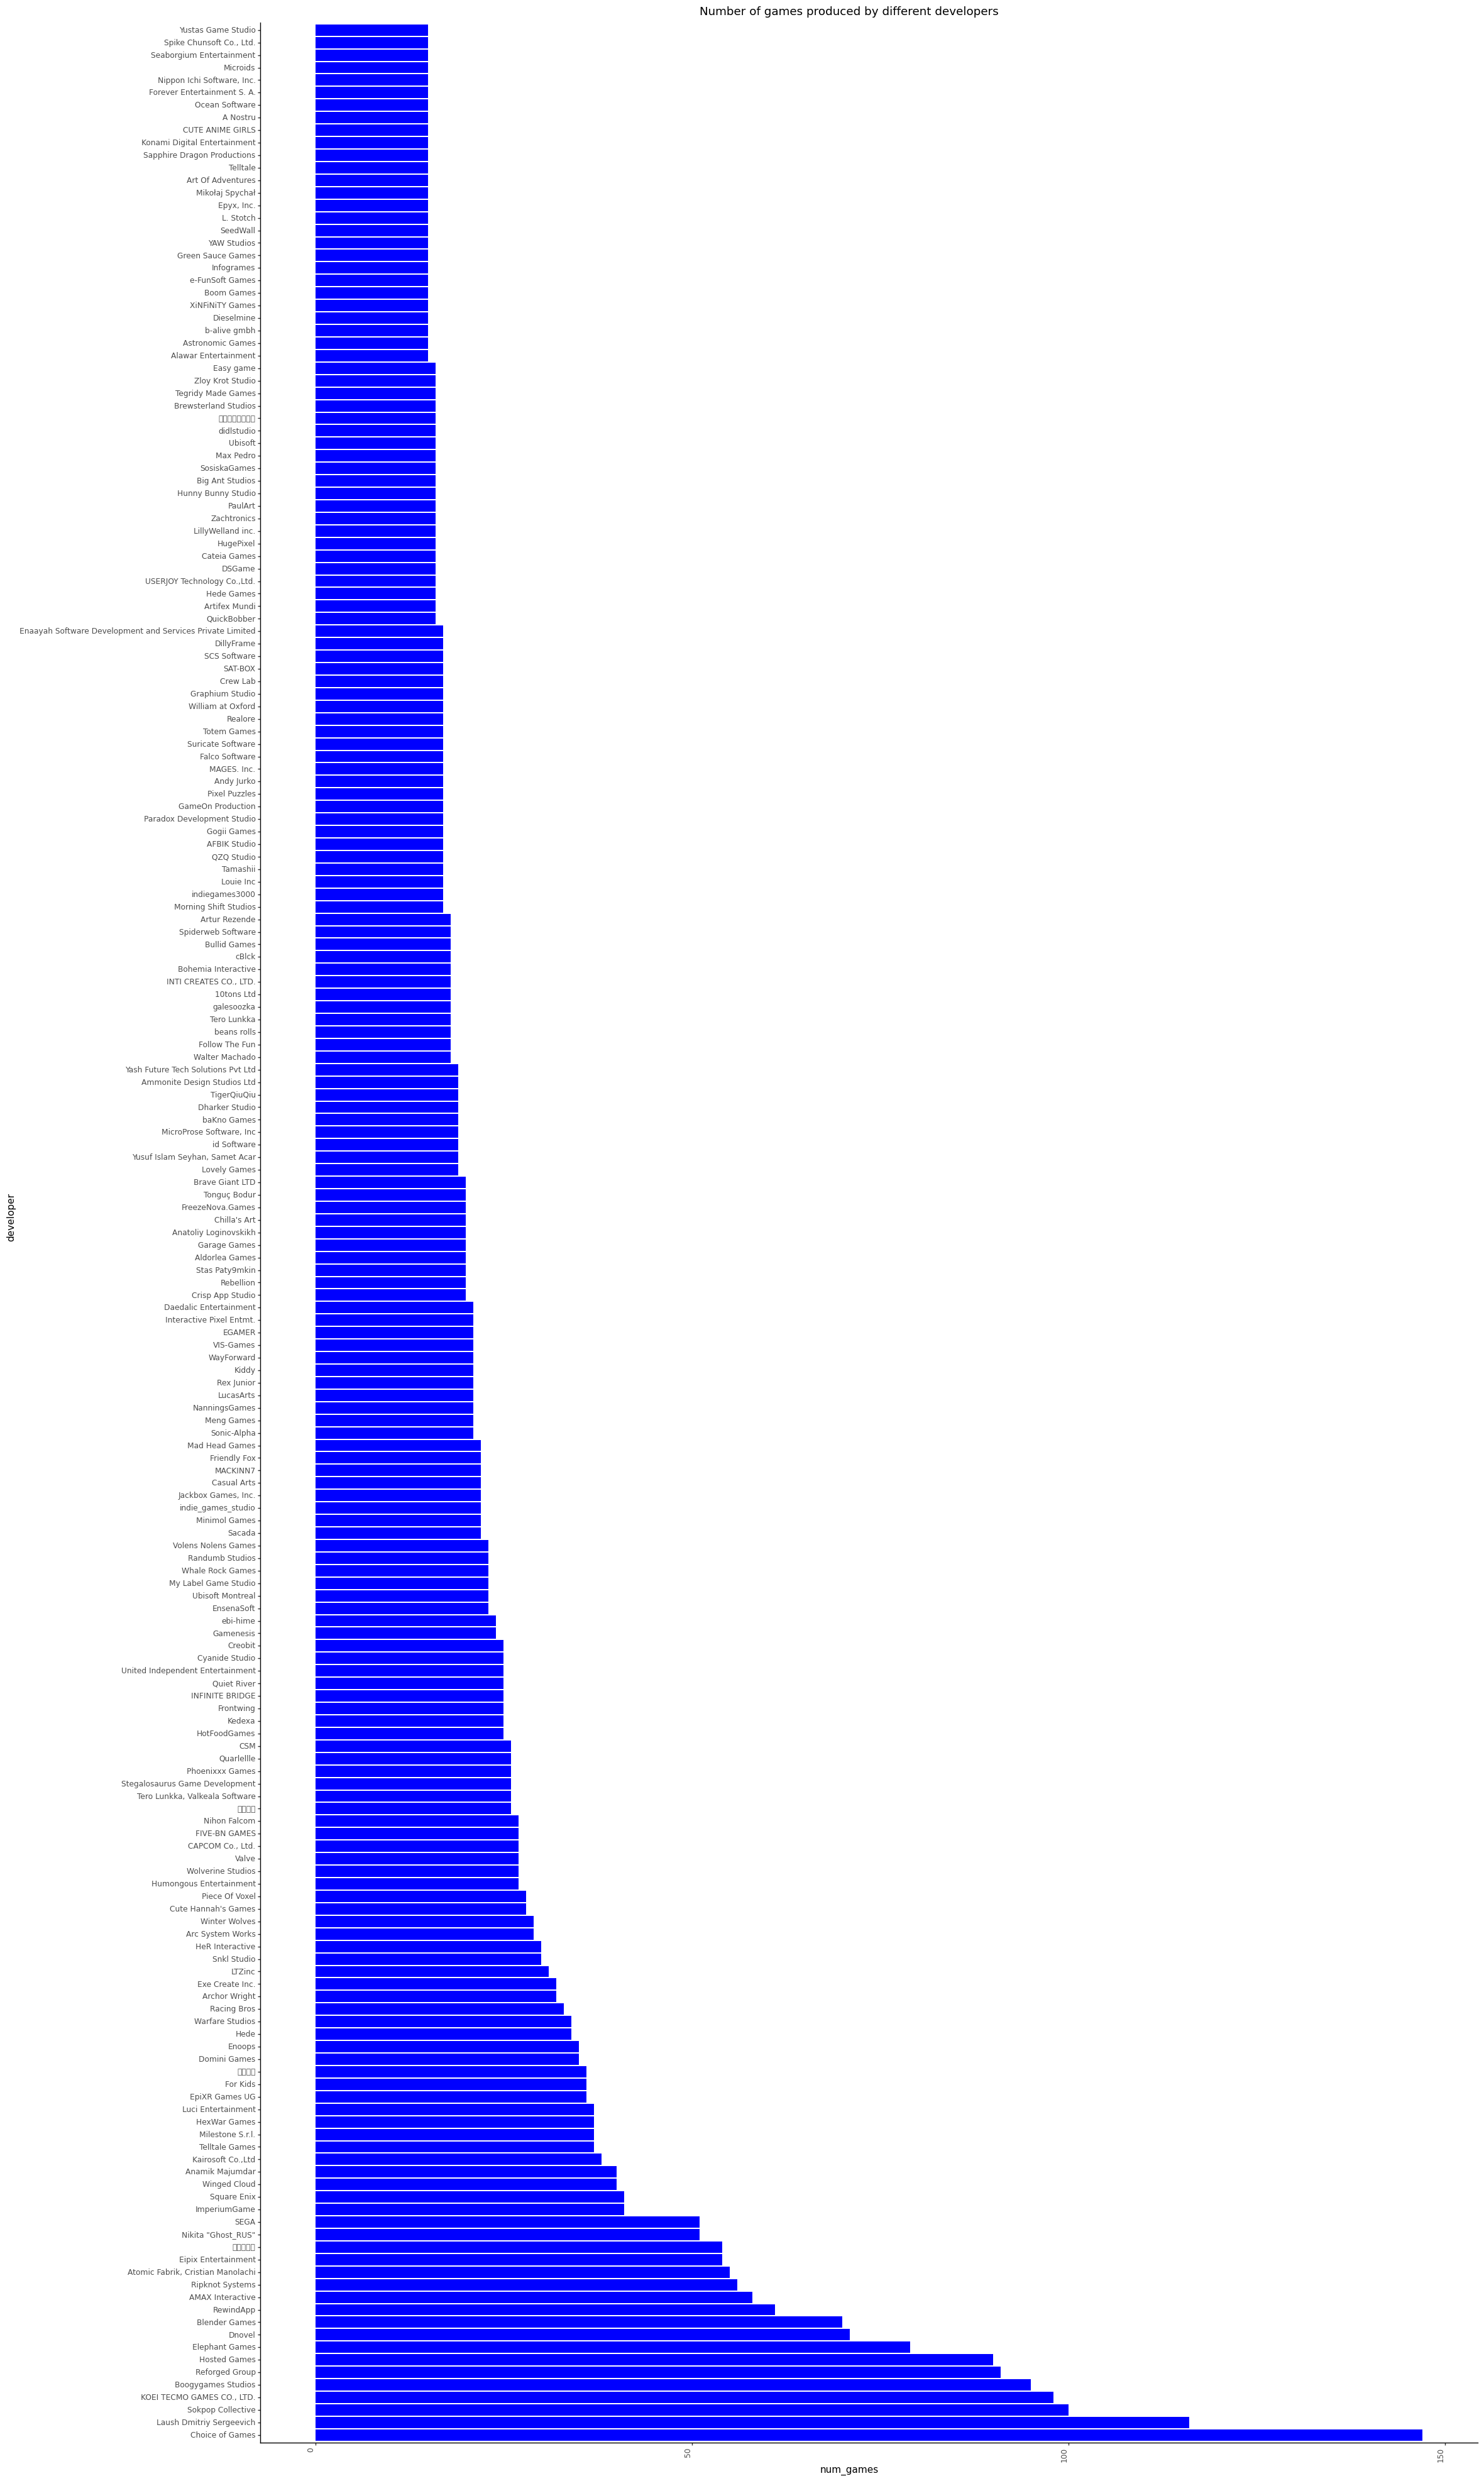

<ggplot: (8776486566632)>

In [128]:
# plot for the df_tmp_all_games and order the x axis by the number of games and make the blank space bigger

g_5 = ggplot(df_tmp_selected_games, aes(x='developer', y='num_games')) +\
        geom_bar(stat='identity', fill='blue') +\
        labs(title='Number of games produced by different developers', x='developer', y='num_games') +\
        theme_classic() +\
        theme(axis_text_x=element_text(angle=90, hjust=1), figure_size=(25, 50)) +\
        coord_flip() +\
        scale_x_discrete(limits=df_tmp_selected_games['developer'].tolist()) 
g_5

### Visualisation 6: 
### what are the developers that created the most top 100 games

In [129]:
groupby_columns = ['developer']

df_tmp_100_games = (
    df_games_100
    .groupby(groupby_columns)['appid']
    .nunique()
    .reset_index(name='num_games')
    .sort_values(by='num_games', ascending=False)
)

df_tmp_100_games

,developer,num_games
74,Valve,16
37,Infinity Ward,2
56,Rockstar Games,2
72,Ubisoft Montreal,2
22,Endnight Games Ltd,2
...,...,...
26,Freejam,1
25,Facepunch Studios,1
24,"Expansive Worlds, Avalanche Studios",1
23,Evil Mojo Games,1


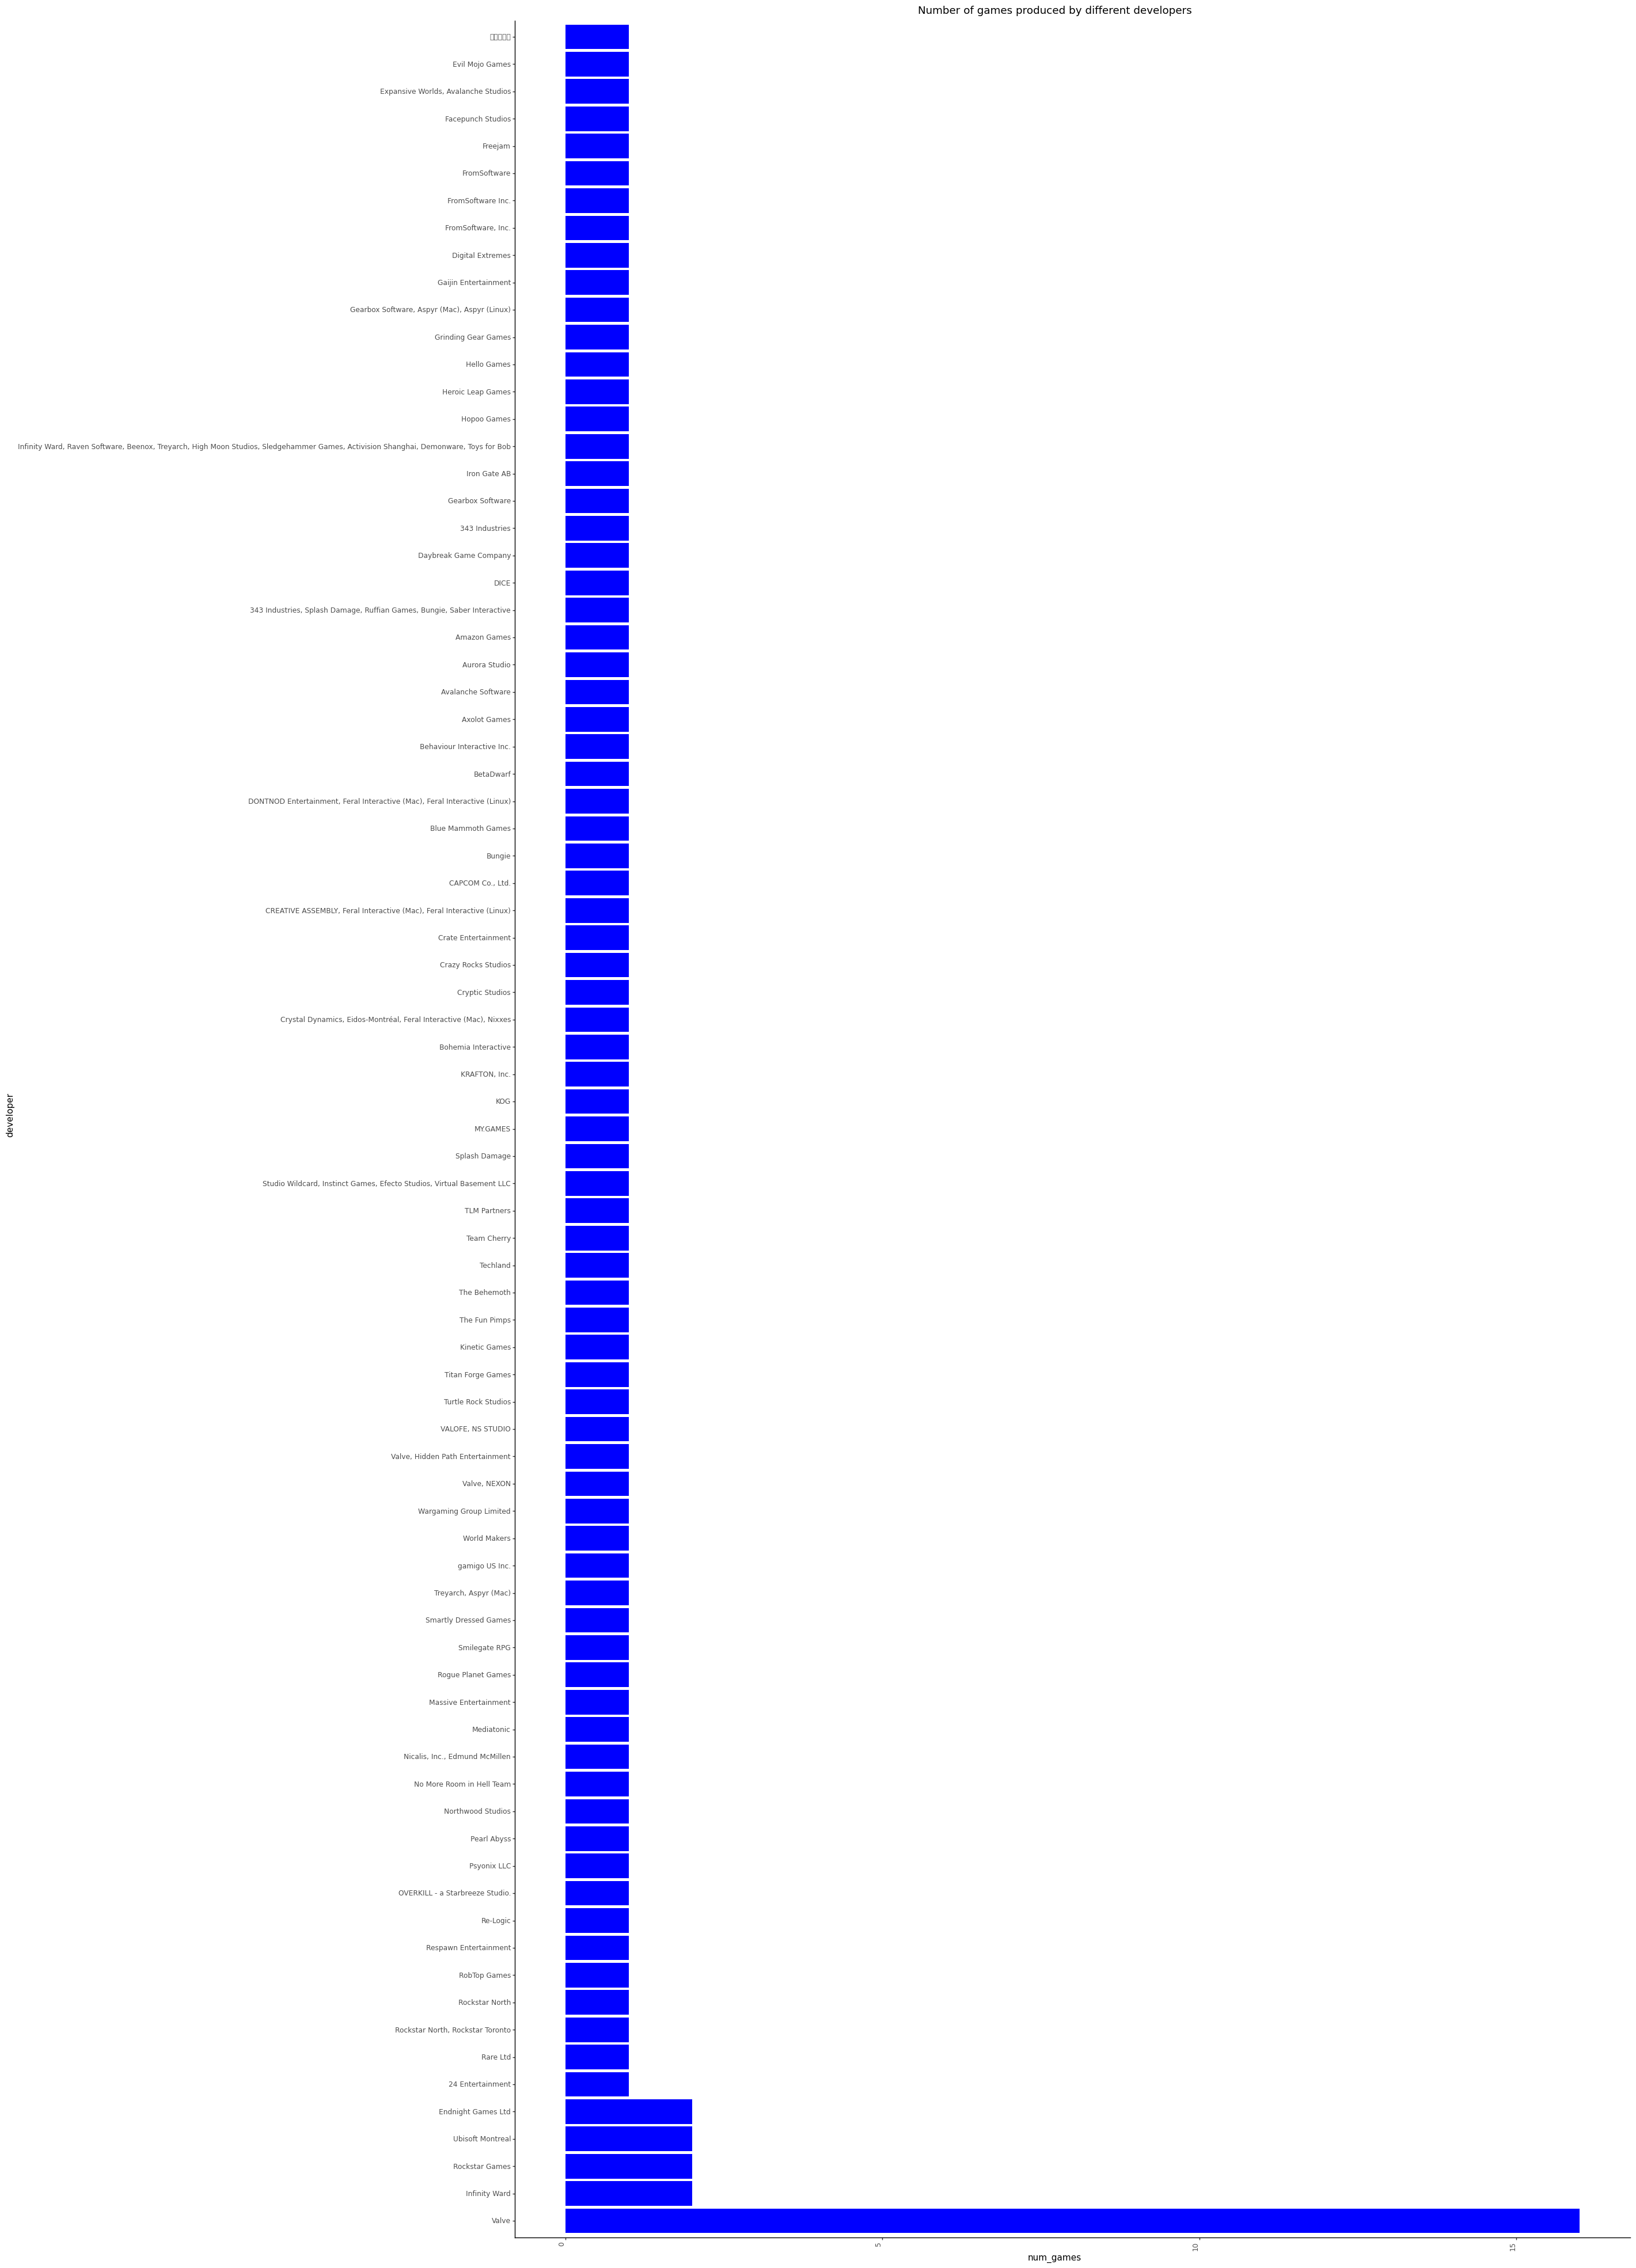

<ggplot: (8776464226461)>

In [130]:
# plot for the df_tmp_selected_100_games and order the x axis by the number of games and make the blank space bigger

g_6 = ggplot(df_tmp_100_games, aes(x='developer', y='num_games')) +\
      geom_bar(stat='identity', fill='blue') +\
      labs(title='Number of games produced by different developers', x='developer', y='num_games') +\
      theme_classic() +\
      theme(axis_text_x=element_text(angle=90, hjust=1), figure_size=(25, 50)) +\
      coord_flip() +\
      scale_x_discrete(limits=df_tmp_100_games['developer'].tolist())
      
g_6


### Visualisation 7: 
### what are the developers who created the most top 500 games

In [131]:
groupby_columns = ['developer']

df_tmp_selected_500_games = (
    df_games_500
    .groupby(groupby_columns)['appid']
    .nunique()
    .reset_index(name='num_games')
    .sort_values(by='num_games', ascending=False)
    .query('num_games > 2')
)

df_tmp_selected_500_games

,developer,num_games
335,Valve,24
45,"CAPCOM Co., Ltd.",11
71,DICE,6
24,Avalanche Studios,5
259,Rockstar Games,5
39,Bohemia Interactive,5
51,Capcom,5
320,Ubisoft Montreal,4
155,Infinity Ward,4
357,id Software,4


In [132]:
df_tmp_500_games = (
    df_games_500
    .groupby(groupby_columns)['appid']
    .nunique()
    .reset_index(name='num_games')
    .sort_values(by='num_games', ascending=False)
)

df_tmp_500_games

,developer,num_games
335,Valve,24
45,"CAPCOM Co., Ltd.",11
71,DICE,6
24,Avalanche Studios,5
259,Rockstar Games,5
...,...,...
132,"Gearbox Software, Aspyr (Mac), Aspyr (Linux)",1
130,Gamepires,1
129,Gaijin Entertainment,1
127,Funcom,1


### Proportion 3: 
### how many developers that create more than 2 games within top 500 games

In [135]:
proportion = len(df_tmp_selected_500_games) / len(df_tmp_500_games) * 100

proportion

7.397260273972603

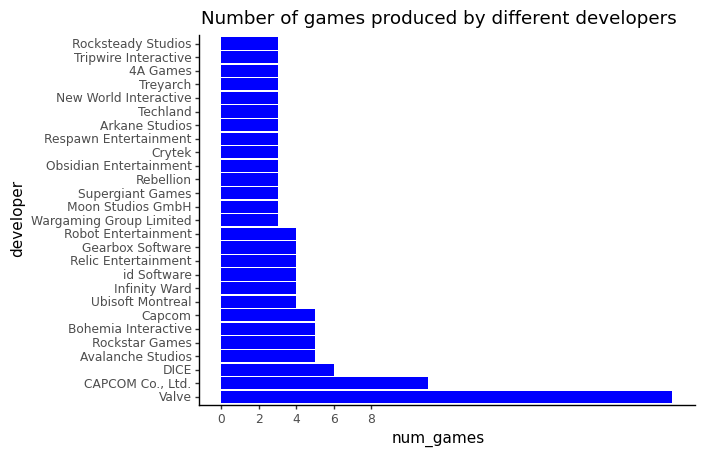

<ggplot: (8776465665515)>

In [136]:
g_7 = (ggplot(df_tmp_selected_500_games, aes(x='developer', y='num_games')) +\
      geom_bar(stat='identity', fill = 'blue') +\
      theme(axis_text_x=element_text(rotation=90, hjust=1), 
           figure_size=(30, 80),
           axis_text=element_text(size=10),
           axis_title=element_text(size=12)) +\
      labs(title='Number of games produced by different developers', x='developer', y='num_games') +\
      coord_flip() +\
      scale_x_discrete(limits=df_tmp_selected_500_games['developer'].tolist()) +\
      scale_y_continuous(breaks=range(0, 10, 2)) +\
      theme_classic())    

g_7

### Visualisation 8: 
### the performance of developers in producing top 100 games

In [137]:
# create a new dataframe with the developer and proportion of games produced that are in the top 100, rename the chinese developer to "guigu studio(Chinese)"
# 100 developers refer to developers that have created games whithin the top 100 games

df_100_developers = (
    df_tmp_100_games
    .merge(df_tmp_all_games, on='developer', how='left')
    .assign(proportion=lambda x: x['num_games_x'] / x['num_games_y'] * 100)
    .rename(columns={'num_games_x': 'num_games_100', 'num_games_y': 'num_games_all'})
    .assign(classification= lambda x: np.where(x['proportion'] >= 50, 'major', 'minor'))
    .sort_values(by='proportion', ascending=False)
    .assign(developer=lambda x: np.where(x['developer'] == '鬼谷工作室', 'guigu studio(transfered from Chinese characters)', x['developer']))
)


df_100_developers

,developer,num_games_100,num_games_all,proportion,classification
80,guigu studio(transfered from Chinese characters),1,1,100.000000,major
29,"VALOFE, NS STUDIO",1,1,100.000000,major
22,Smartly Dressed Games,1,1,100.000000,major
59,"343 Industries, Splash Damage, Ruffian Games, ...",1,1,100.000000,major
58,Amazon Games,1,1,100.000000,major
...,...,...,...,...,...
3,Ubisoft Montreal,2,23,8.695652,minor
60,DICE,1,12,8.333333,minor
63,Gearbox Software,1,13,7.692308,minor
43,Bohemia Interactive,1,18,5.555556,minor


### what developers have the best ability to produce top 100 games

In [138]:
df_100_developers_super = (
    df_100_developers
    .query('num_games_all >= 2 and proportion > 50')
    .sort_values(by='proportion', ascending=False)
)

df_100_developers_super

,developer,num_games_100,num_games_all,proportion,classification
4,Endnight Games Ltd,2,2,100.000000,major
0,Valve,16,27,59.259259,major


#### proportion_major: Proportion showing how many developers have major ability(>=50%) to create top 100 games

In [139]:
proportion_major = len(df_100_developers.query('classification == "major"')) / len(df_100_developers) * 100

proportion_major

66.66666666666666

#### proportion_100_developers: Proportion showing how many developers have created top 100 games 

In [140]:
proportion_100_developers = len(df_100_developers) / len(df_tmp_all_games) * 100

proportion_100_developers

# 100_developers are developers that have created games whithin the top 100 games

0.22146274777853728

**100 developers refer to developers that have created games whithin the top 100 games**


In [141]:
# create a new column in df_all_games with the classification of the developer and the proportion of games produced that are in the top 100


df_all_games = (
    df_all_games
    .merge(df_100_developers[['developer', 'classification']], on='developer', how='left')
    # replace the NaN values with 'minus‘
    .fillna('minus')
)


In [142]:
# rename the column classification_y to developer_classification and rename classfication_x to developer_and_publisher_classification

df_all_games = (
    df_all_games
    .rename(columns={'classification_x': 'developer_and_publisher_classification', 'classification_y': 'developer_classification'})
)

df_all_games


,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,...,median_forever,median_2weeks,price,initialprice,discount,ccu,spy_rank,ranking,developer_and_publisher_classification,developer_classification
0,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,minus,6207621,811918,0,"50,000,000 .. 100,000,000",30347,...,5979,331,0,0,0,1010721,2,1.0,different,major
1,570,Dota 2,Valve,Valve,minus,1611153,338953,0,"200,000,000 .. 500,000,000",37228,...,853,711,0,0,0,532699,1,2.0,same,major
2,1172470,Apex Legends,Respawn Entertainment,Electronic Arts,minus,513660,105734,0,"50,000,000 .. 100,000,000",8491,...,834,498,0,0,0,363786,3,3.0,different,minor
3,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",minus,1231039,925364,0,"50,000,000 .. 100,000,000",22551,...,5940,230,0,0,0,328139,4,4.0,same,minor
4,1085660,Destiny 2,Bungie,Bungie,minus,442135,89132,0,"20,000,000 .. 50,000,000",8276,...,361,1277,0,0,0,171726,18,5.0,same,major
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58200,1091260,Crunch,K7 Software,K7 Software,minus,11,1,0,"0 .. 20,000",0,...,0,0,0,0,0,0,23520,16942.0,same,minus
58201,1061900,ThunderGod,Goodbye Kansas Game Invest,Goodbye Kansas Game Invest,minus,11,3,0,"0 .. 20,000",0,...,0,0,999,999,0,0,23521,16942.0,same,minus
58202,1069270,Rotatex,Dnovel,My Way Games,minus,18,7,0,"0 .. 20,000",0,...,0,0,119,1199,90,0,23522,16942.0,different,minus
58203,1027060,CreatorCrate,Jori Ryan,CreatorCrate Games,minus,14,1,0,"0 .. 20,000",0,...,0,0,499,499,0,0,23513,16942.0,different,minus


In [143]:
df_all_games.to_csv('df_all_games_with_two_classifications.csv', index=False)

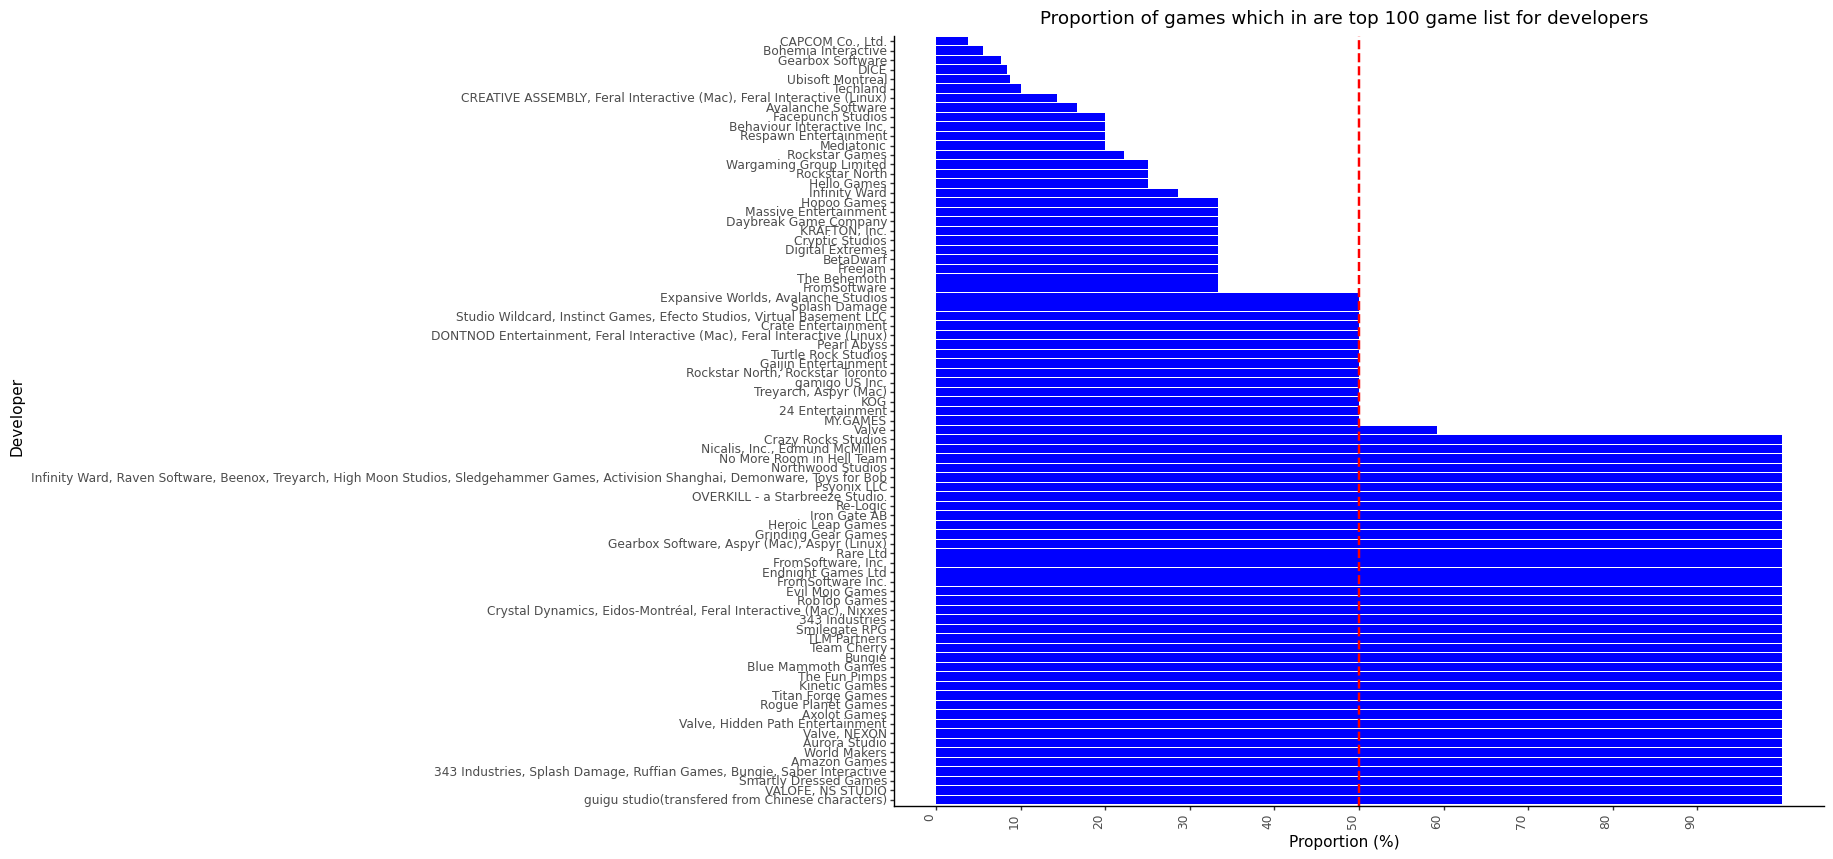

<ggplot: (8776487348673)>

In [144]:
# plot for df_100_developer's proportion of games in the top 100 and order the x axis by the number of games and make the blank space bigger

g_7 = (ggplot(df_100_developers, aes(x='developer', y='proportion')) +\
    geom_bar(stat='identity', fill='blue') +\
    labs(title='Proportion of games which in are top 100 game list for developers', x='Developer', y='Proportion (%)') +\
    theme_classic() +\
    theme(axis_text_x=element_text(angle=90, hjust=1), figure_size=(12, 10)) +\
    coord_flip() +\
    scale_x_discrete(limits=df_100_developers['developer'].tolist()) +\
    scale_y_continuous(breaks=range(0, 100, 10)) +\
        
    # add a line to show the proportion of 50%
    geom_hline(yintercept=50, color='red', linetype='dashed', size=1)
)

g_7
                

## Data Pre-Processing : Pivoting

In [145]:
# pivot the data

# for the developer column

df_games_100['developer']

1     Valve, Hidden Path Entertainment
0                                Valve
2                Respawn Entertainment
3                        KRAFTON, Inc.
17                              Bungie
                    ...               
76                               Valve
65                               Valve
70                               Valve
46                 Crazy Rocks Studios
22    Rockstar North, Rockstar Toronto
Name: developer, Length: 100, dtype: object

In [146]:
developers = df_games_100['developer'].unique().tolist()

developers

['Valve, Hidden Path Entertainment',
 'Valve',
 'Respawn Entertainment',
 'KRAFTON, Inc.',
 'Bungie',
 'Rockstar North',
 'Facepunch Studios',
 '24 Entertainment',
 'Smilegate RPG',
 'Infinity Ward, Raven Software, Beenox, Treyarch, High Moon Studios, Sledgehammer Games, Activision Shanghai, Demonware, Toys for Bob',
 'Gaijin Entertainment',
 'Ubisoft Montreal',
 'Smartly Dressed Games',
 'Avalanche Software',
 'Studio Wildcard, Instinct Games, Efecto Studios, Virtual Basement LLC',
 'OVERKILL - a Starbreeze Studio.',
 'Digital Extremes',
 'FromSoftware Inc.',
 'Re-Logic',
 'Psyonix LLC',
 'Behaviour Interactive Inc.',
 'CAPCOM Co., Ltd.',
 'Iron Gate AB',
 'Rockstar Games',
 'Endnight Games Ltd',
 'The Fun Pimps',
 'Rare Ltd',
 'Pearl Abyss',
 'Grinding Gear Games',
 'Nicalis, Inc., Edmund McMillen',
 'Amazon Games',
 'Bohemia Interactive',
 'Wargaming Group Limited',
 'DICE',
 'Kinetic Games',
 'Titan Forge Games',
 'Blue Mammoth Games',
 'FromSoftware',
 'Treyarch, Aspyr (Mac)',
 'E

In [147]:
selected_cols = ['developer']+ developers

selected_cols

['developer',
 'Valve, Hidden Path Entertainment',
 'Valve',
 'Respawn Entertainment',
 'KRAFTON, Inc.',
 'Bungie',
 'Rockstar North',
 'Facepunch Studios',
 '24 Entertainment',
 'Smilegate RPG',
 'Infinity Ward, Raven Software, Beenox, Treyarch, High Moon Studios, Sledgehammer Games, Activision Shanghai, Demonware, Toys for Bob',
 'Gaijin Entertainment',
 'Ubisoft Montreal',
 'Smartly Dressed Games',
 'Avalanche Software',
 'Studio Wildcard, Instinct Games, Efecto Studios, Virtual Basement LLC',
 'OVERKILL - a Starbreeze Studio.',
 'Digital Extremes',
 'FromSoftware Inc.',
 'Re-Logic',
 'Psyonix LLC',
 'Behaviour Interactive Inc.',
 'CAPCOM Co., Ltd.',
 'Iron Gate AB',
 'Rockstar Games',
 'Endnight Games Ltd',
 'The Fun Pimps',
 'Rare Ltd',
 'Pearl Abyss',
 'Grinding Gear Games',
 'Nicalis, Inc., Edmund McMillen',
 'Amazon Games',
 'Bohemia Interactive',
 'Wargaming Group Limited',
 'DICE',
 'Kinetic Games',
 'Titan Forge Games',
 'Blue Mammoth Games',
 'FromSoftware',
 'Treyarch, Asp

In [148]:
len(selected_cols)

82

In [149]:
# make a table that column of categorto check whether the rows meet the condition

for developer in developers:
    df_games_100[developer] = (df_games_100["developer"] == developer).astype(int)

In [150]:
df_games_100.columns

Index(['appid', 'name', 'developer', 'publisher', 'score_rank', 'positive',
       'negative', 'userscore', 'owners', 'average_forever',
       ...
       'Aurora Studio', 'Daybreak Game Company', 'Freejam',
       'DONTNOD Entertainment, Feral Interactive (Mac), Feral Interactive (Linux)',
       'KOG', 'Splash Damage', 'Gearbox Software', 'Turtle Rock Studios',
       'Crazy Rocks Studios', 'Rockstar North, Rockstar Toronto'],
      dtype='object', length=101)

In [161]:
index_cols = ['spy_rank', 'appid']
col_aggregator = ['developer']
value_col = ['present']

#select the columns that we want to use
selected_cols = index_cols + col_aggregator + value_col

pivot_table = df_games_100\
               .assign(present=1)[selected_cols]\
              .pivot_table(index=index_cols, columns=col_aggregator, values=value_col, fill_value=0)\
              .reset_index()

pivot_table['present'] = pivot_table['present'].astype(int)

pivot_table

spy_rank    appid          present                 \
developer                   24 Entertainment 343 Industries   
0                1      570                0              0   
1                2      730                0              0   
2                3  1172470                0              0   
3                4   578080                0              0   
4                5  1063730                0              0   
..             ...      ...              ...            ...   
95              96   594570                0              0   
96              97   319630                0              0   
97              98    12120                0              0   
98              99   109600                0              0   
99             100   311210                0              0   

                                                                                   \
developer 343 Industries, Splash Damage, Ruffian Games, Bungie, Saber Interactive   
0                                                          0                        
1                                                          0                        
2                                                          0                        
3                                                          0                        
4                                                          0                        
..                                                       ...                        
95                                                         0                        
96                                                         0                        
97                                                         0                        
98                                                         0                        
99                                                         0                        

                                                                      \
developer Amazon Games Aurora Studio Avalanche Software Axolot Games   
0                    0             0                  0            0   
1                    0             0                  0            0   
2                    0             0                  0            0   
3                    0             0                  0            0   
4                    1             0                  0            0   
..                 ...           ...                ...          ...   
95                   0             0                  0            0   
96                   0             0                  0            0   
97                   0             0                  0            0   
98                   0             0                  0            0   
99                   0             0                  0            0   

                                      ...                      \
developer Behaviour Interactive Inc.  ... Turtle Rock Studios   
0                                  0  ...                   0   
1                                  0  ...                   0   
2                                  0  ...                   0   
3                                  0  ...                   0   
4                                  0  ...                   0   
..                               ...  ...                 ...   
95                                 0  ...                   0   
96                                 0  ...                   0   
97                                 0  ...                   0   
98                                 0  ...                   0   
99                                 0  ...                   0   

                                                    \
developer Ubisoft Montreal VALOFE, NS STUDIO Valve   
0                        0                 0     1   
1                        0                 0     0   
2                        0                 0     0   
3                        0     

In [164]:
# bigger pivot table 

index_cols      = ['appid','name','spy_rank']
col_aggregators = ['developer']

#select the columns that we want to use
selected_cols = index_cols + col_aggregators 

df_pivotted_bigger = df_games_100\
    .pivot_table(index=index_cols, columns=col_aggregators, 
                 fill_value=0, margins=True, aggfunc=np.sum)\
    .reset_index()\
    .set_index(['spy_rank', 'name', 'appid'])\
    .sort_index()
    
df_pivotted_bigger.to_csv('df_pivotted_bigger.csv')

df_pivotted_bigger

24 Entertainment  \
developer                                         24 Entertainment   
spy_rank name                             appid                      
1        Dota 2                           570                    0   
2        Counter-Strike: Global Offensive 730                    0   
3        Apex Legends                     1172470                0   
4        PUBG: BATTLEGROUNDS              578080                 0   
5        New World                        1063730                0   
...                                                            ...   
97       Life is Strange - Episode 1      319630                 0   
98       Grand Theft Auto: San Andreas    12120                  0   
99       Neverwinter                      109600                 0   
100      Call of Duty: Black Ops III      311210                 0   
                                          All                    0   

                                                                  \
developer                                         343 Industries   
spy_rank name                             appid                    
1        Dota 2                           570                  0   
2        Counter-Strike: Global Offensive 730                  0   
3        Apex Legends                     1172470              0   
4        PUBG: BATTLEGROUNDS              578080               0   
5        New World                        1063730              0   
...                                                          ...   
97       Life is Strange - Episode 1      319630               0   
98       Grand Theft Auto: San Andreas    12120                0   
99       Neverwinter                      109600               0   
100      Call of Duty: Black Ops III      311210               0   
                                          All                  0   

                                                                                                                           \
developer                                         343 Industries, Splash Damage, Ruffian Games, Bungie, Saber Interactive   
spy_rank name                             appid                                                                             
1        Dota 2                           570                                                      0                        
2        Counter-Strike: Global Offensive 730                                                      0                        
3        Apex Legends                     1172470                                                  0                        
4        PUBG: BATTLEGROUNDS              578080                                                   0                        
5        New World                        1063730                                                  0                        
...                                                                                              ...                        
97       Life is Strange - Episode 1      319630                                                   0                        
98       Grand Theft Auto: San Andreas    12120                                                    0                        
99       Neverwinter                      109600                                                   0                        
100      Call of Duty: Black Ops III      311210                                                   0                        
                                          All                                                      0                        

                                                                              \
developer                                         Amazon Games Aurora Studio   
spy_rank name                             appid                                
1        Dota 2                           570                0             0   
2        Counter-Strike: Global Offensive 730

### Visualisation 8: heatmap

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

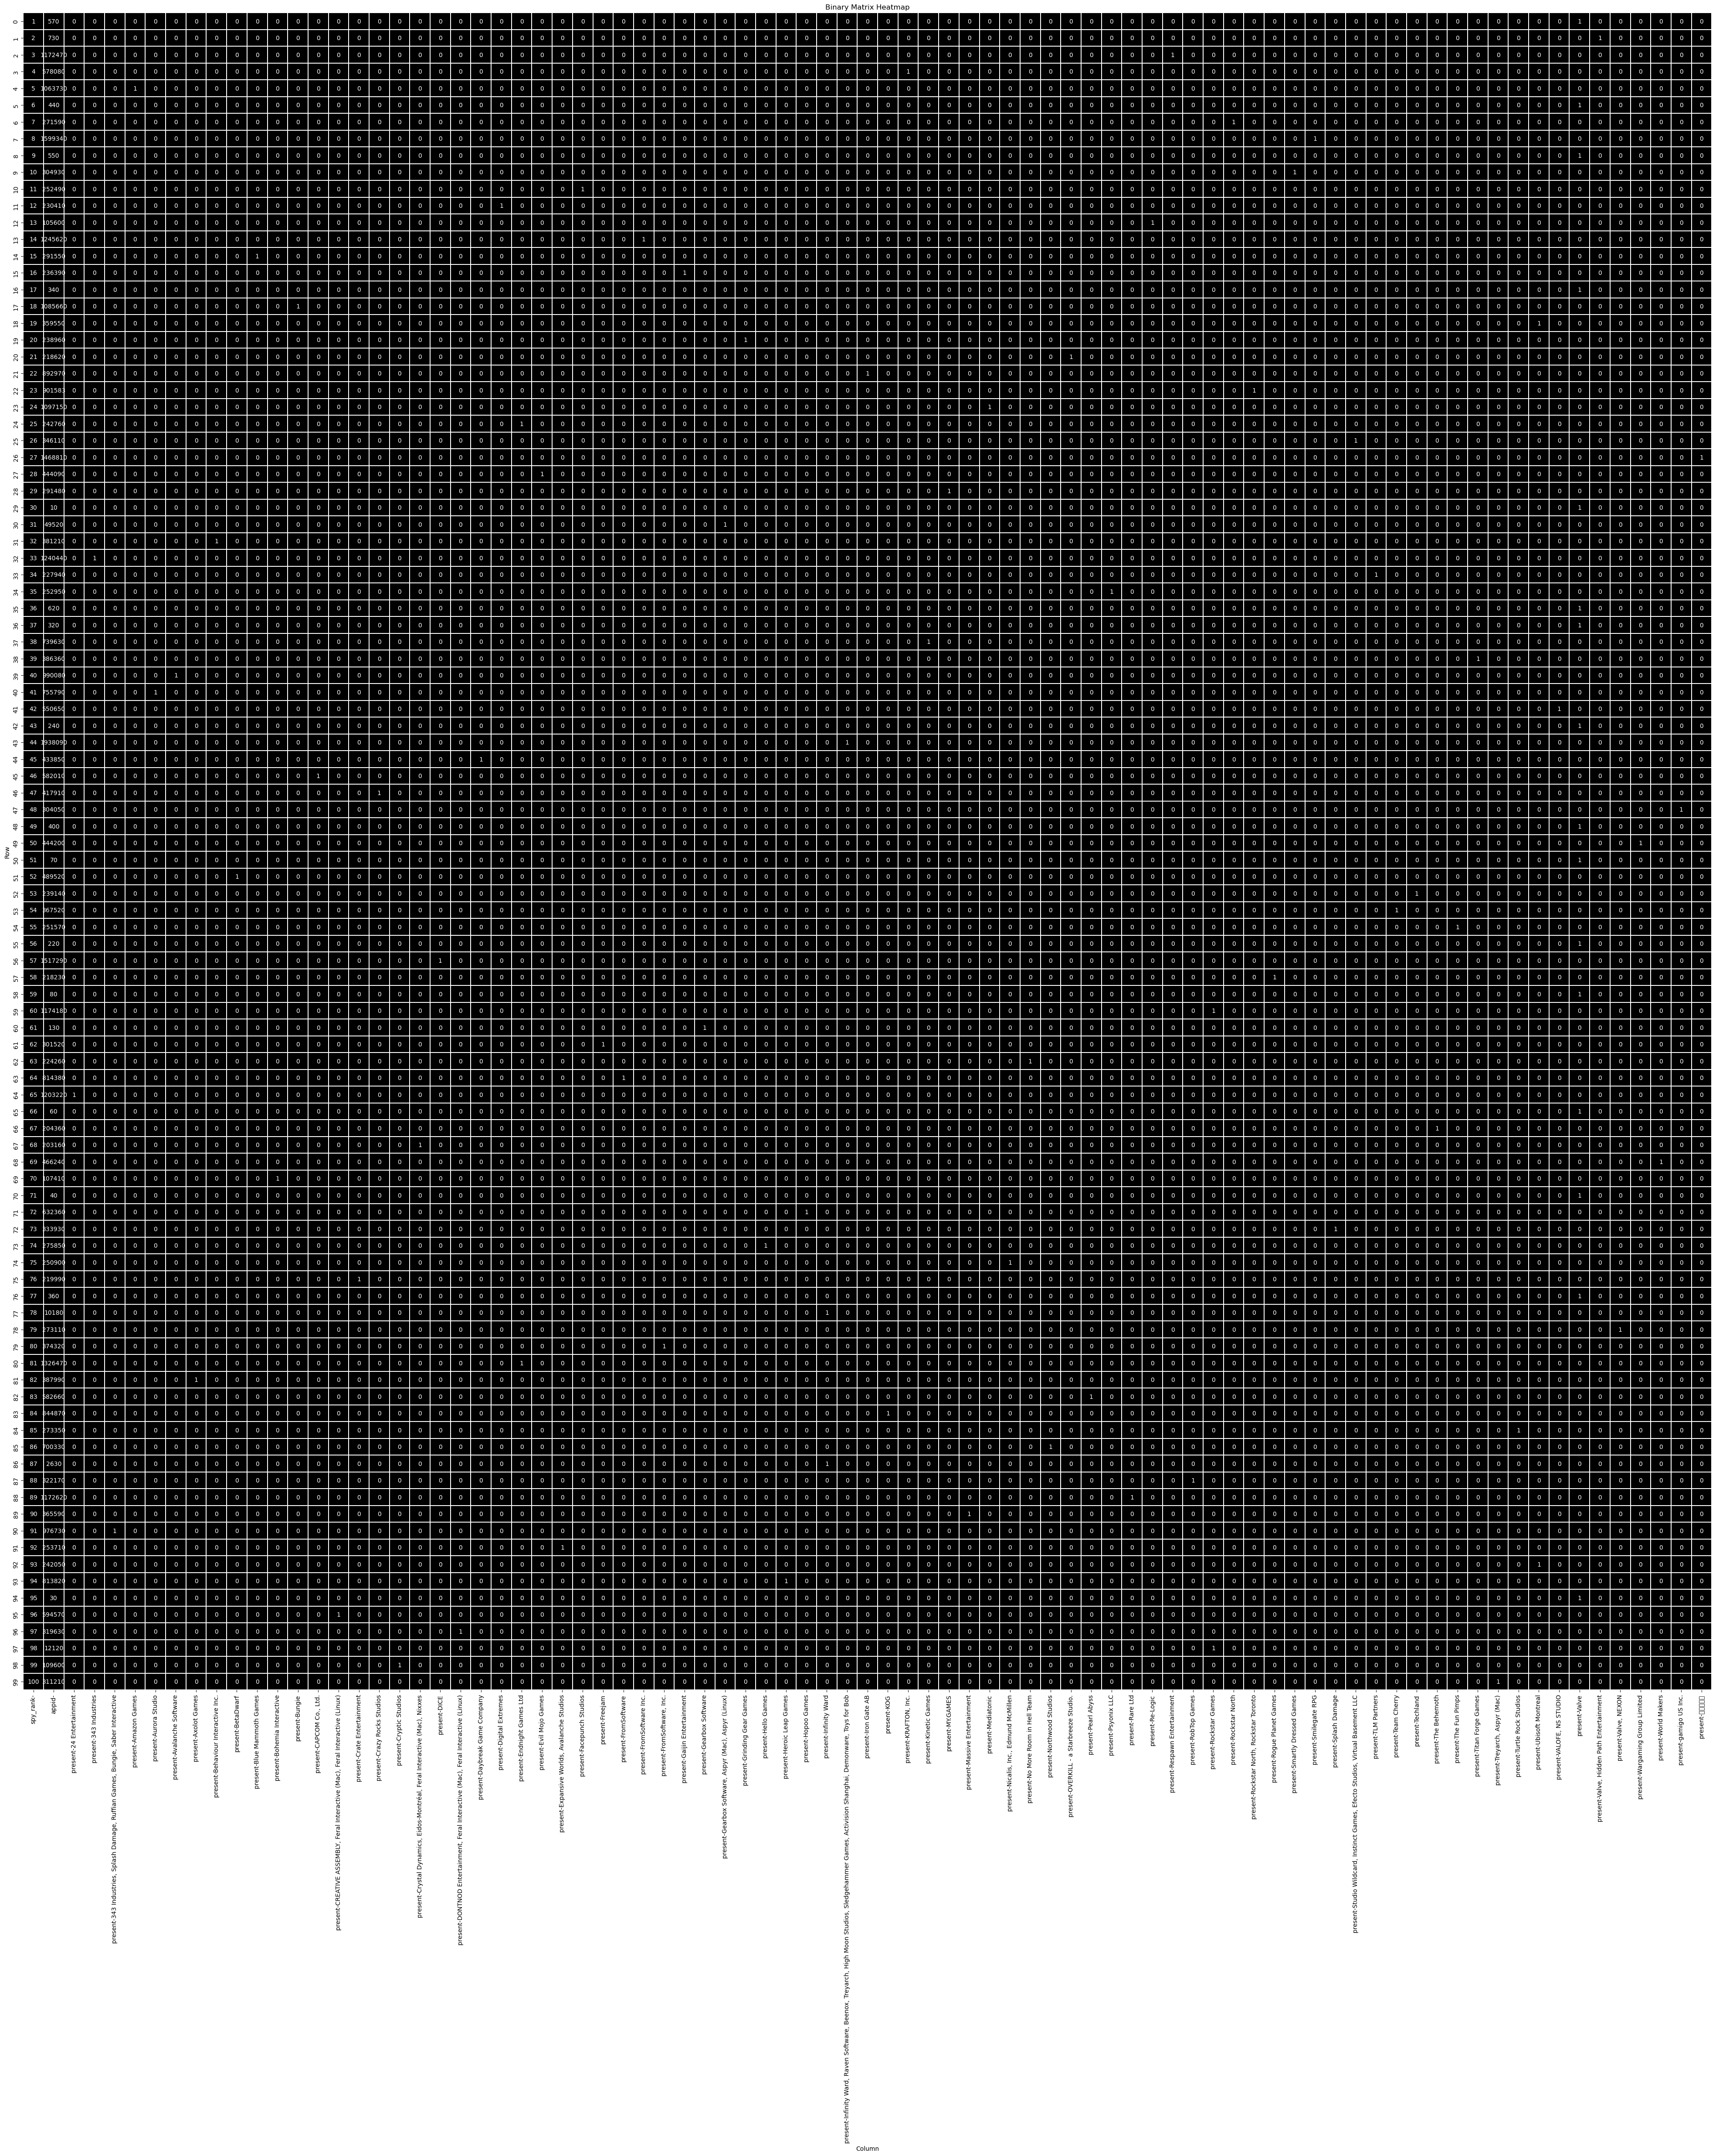

In [162]:
# Create a custom color map for the binary values
cmap = sns.color_palette(["#FFFFFF", "#000000"])

# Set the plot size
plt.figure(figsize=(50, 50))

# Plot the heatmap with binary color map
sns.heatmap(pivot_table, cmap=cmap, center=0, linewidths=.20, annot=True, fmt='.0f', cbar=False)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Set the plot title and axis labels
plt.title('Binary Matrix Heatmap')
plt.xlabel('Column')
plt.ylabel('Row')

# Show the plot
plt.show()